In [1]:
%pwd

'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution\\notebooks'

In [2]:
%cd C:\Users\Peter\PycharmProjects\olfaction_evolution

C:\Users\Peter\PycharmProjects\olfaction_evolution


In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel

%matplotlib inline

C:\Users\Peter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

In [5]:
path = 'files/cluster_separate_lr_1e-3_prune_50/'
x = tools.load_all_results(path, argLast=True)


['files/cluster_separate_lr_1e-3_prune_50/000000', 'files/cluster_separate_lr_1e-3_prune_50/000001', 'files/cluster_separate_lr_1e-3_prune_50/000002', 'files/cluster_separate_lr_1e-3_prune_50/000003', 'files/cluster_separate_lr_1e-3_prune_50/000004', 'files/cluster_separate_lr_1e-3_prune_50/000005']


In [6]:
x.keys()

dict_keys(['w_bins', 'w_bins_log', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'lr_now', 'val_loss', 'val_acc', 'val_acc2', 'coding_level', 'coding_level_per_kc', 'coding_level_per_odor', 'log_hist', 'hist', 'kc_w_sum', 'lin_hist', 'sparsity', 'thres', 'sparsity_fixthres', 'K', 'bad_KC', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'coding_level_set', 'combinatorial_density', 'data_dir', 'dataset', 'decay_rate', 'decay_steps', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'kc_prune_threshold', 'kc_prune_weak_weights', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 

In [7]:
w_bins_log = np.linspace(-20, 5, 200)

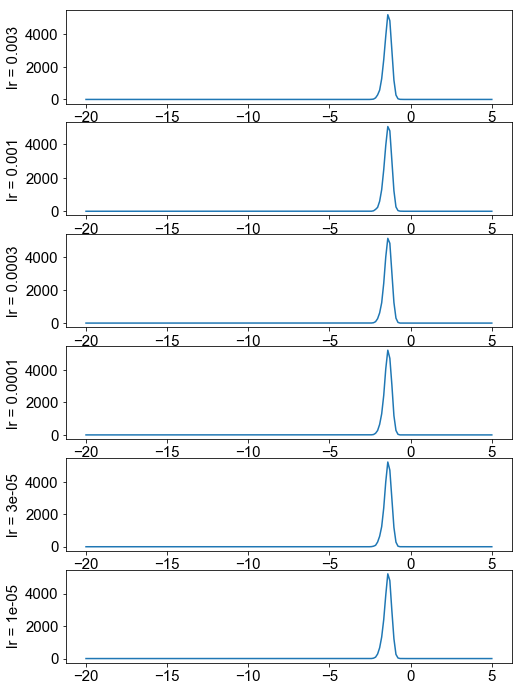

In [8]:
fig, axs =plt.subplots(6,figsize=(8,12))
for i in range(x['log_hist'].shape[0]):
    axs[i].plot(w_bins_log,x['log_hist'][i].T)
    axs[i].set_ylabel('lr = {}'.format(x['lr'][i]))

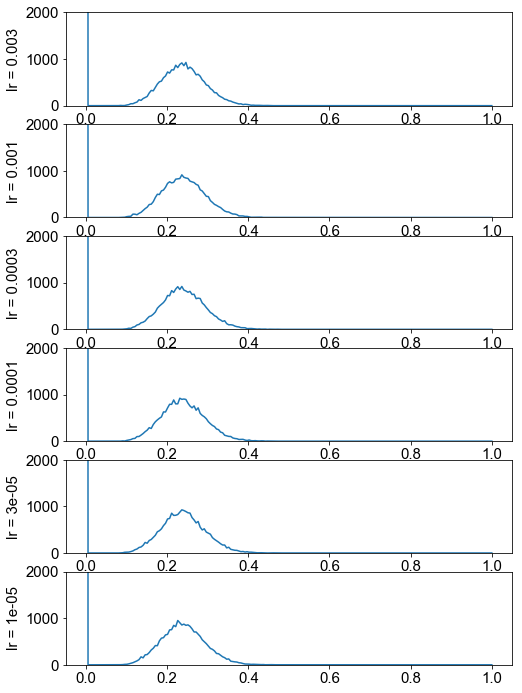

In [9]:
fig, axs =plt.subplots(6,figsize=(8,12))
lin_bins = np.linspace(0, 1, 200)
for i in range(x['log_hist'].shape[0]):
    axs[i].plot(lin_bins,x['hist'][i].T)
    plt.sca(axs[i])
    plt.ylim([0, 2000])
    plt.ylabel('lr = {}'.format(x['lr'][i]))

In [10]:
x.keys()

dict_keys(['w_bins', 'w_bins_log', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'lr_now', 'val_loss', 'val_acc', 'val_acc2', 'coding_level', 'coding_level_per_kc', 'coding_level_per_odor', 'log_hist', 'hist', 'kc_w_sum', 'lin_hist', 'sparsity', 'thres', 'sparsity_fixthres', 'K', 'bad_KC', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'coding_level_set', 'combinatorial_density', 'data_dir', 'dataset', 'decay_rate', 'decay_steps', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'kc_prune_threshold', 'kc_prune_weak_weights', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 

In [11]:
x['coding_level']

array([0.66238223, 0.66186479, 0.6622729 , 0.66123926, 0.66109272,
       0.66309463])

In [12]:
x['train_acc']

array([0.84765625, 0.8203125 , 0.81640625, 0.859375  , 0.85546875,
       0.828125  ], dtype=float32)

In [13]:
x['sparsity'].mean(axis=1)

array([9.242 , 9.256 , 9.2812, 9.3252, 9.2648, 9.272 ])

In [14]:
x['thres']

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [15]:
x['lr']

array([3.e-03, 1.e-03, 3.e-04, 1.e-04, 3.e-05, 1.e-05])

Text(0,0.5,'Sparsity')

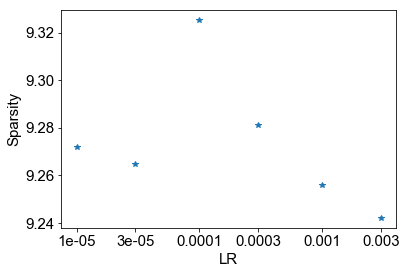

In [16]:
plt.plot(np.log(x['lr']), x['sparsity'].mean(axis=1), '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('LR')
plt.ylabel('Sparsity')

Text(0,0.5,'Train Accuracy')

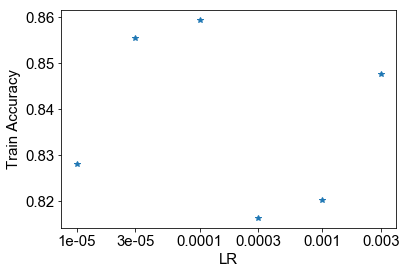

In [17]:
plt.plot(np.log(x['lr']), x['train_acc'], '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('LR')
plt.ylabel('Train Accuracy')

Text(0,0.5,'Threshold')

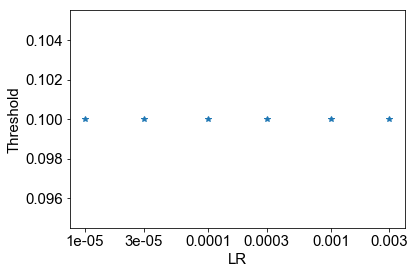

In [18]:
plt.plot(np.log(x['lr']), x['thres'], '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('LR')
plt.ylabel('Threshold')

Text(0,0.5,'coding level')

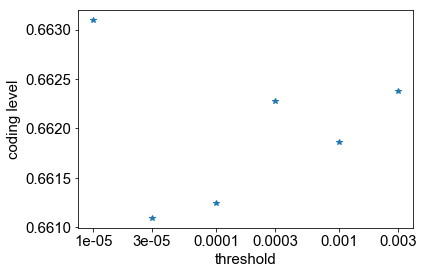

In [21]:
plt.plot(np.log(x['lr']), x['coding_level'], '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('threshold')
plt.ylabel('coding level')

In [20]:
w_glo = tools.load_pickle(path, 'w_glo')[0]

FileNotFoundError: [Errno 2] No such file or directory: 'files/cluster_separate_lr_1e-3_prune_50/000000\\model.pkl'

In [ ]:
plt.imshow(w_glo[:,:30])
plt.colorbar()

In [ ]:
_ = plt.hist(w_glo.flatten(), bins=100, range = [0, 4])
plt.ylim([0, 10000])

In [ ]:
log = tools.load_all_results(path, argLast=False)

In [ ]:
sp = np.mean(log['sparsity'], axis=2)

In [ ]:
sp.shape

In [ ]:
from matplotlib import cm

start = 0.0
stop = 1.0
number_of_lines= sp.shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.cool(x) for x in cm_subsection ]

In [ ]:
data = sp[1:,:]
legend = log['lr'][1:]

In [ ]:
for i, d in enumerate(data):
    plt.plot(d, color=colors[i])
plt.legend(legend)
plt.ylabel('Sparsity (K)')
plt.xlabel('Epoch')